In [19]:
import cv2
import albumentations as A
import numpy as np
from PIL import Image
from tqdm import tqdm
import random
from matplotlib import pyplot as plt
import matplotlib.patches as patches

In [20]:
def visualize_bbox(img, bbox, class_name, color=(255, 0, 0), thickness=5):
    x_min, y_min, x_max, y_max = map(int, bbox)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, thickness)
    return img

In [21]:
def visualize(image):
  plt.figure(figsize=(10,10))
  plt.axis("off")
  plt.imshow(image)
  plt.show()


In [22]:
def plot_examples(images, bboxes=None):
    fig = plt.figure(figsize=(15, 15))
    columns = 4
    rows = 5

    for i in range(1, len(images)):
        if bboxes is not None:
            img = visualize_bbox(images[i - 1], bboxes[i - 1], class_name="Elon")
        else:
            img = images[i - 1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()


In [23]:
image = cv2.imread("Images/cat.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
bboxes = [[13, 170,224, 410]] # This is pascal VOC
# Pascal_voc (x_min, y_min, x_max, y_max), YOLO (Height, Width), COCO

In [24]:
transform = A.Compose([
    A.Resize(width=1920, height=720),
    A.RandomCrop(width=1280, height = 720),
    A.Rotate(limit=45, p=0.9, border_mode = cv2.BORDER_CONSTANT),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.1),
    A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p = 0.9),
    A.OneOf(
        [
            A.Blur(blur_limit=3, p=0.5),
         A.ColorJitter(p=0.5),
        ],
        p=1.0,
    ),
], bbox_params=A.BboxParams(format="pascal_voc", min_area=2048, min_visibility=0.3, label_fields=[])
)

#https://medium.com/pytorch/multi-target-in-albumentations-16a777e9006e

In [25]:
images_list = [image]
saved_bboxes = [bboxes[0]]

In [26]:
for i in tqdm(range(15)):
  augmentations = transform(image=image, bboxes=bboxes)
  augmented_img = augmentations["image"]
  if len(augmentations["bboxes"]) ==0:
    continue
  images_list.append(augmented_img)
  saved_bboxes.append(augmentations["bboxes"][0])

100%|██████████| 15/15 [00:00<00:00, 30.86it/s]


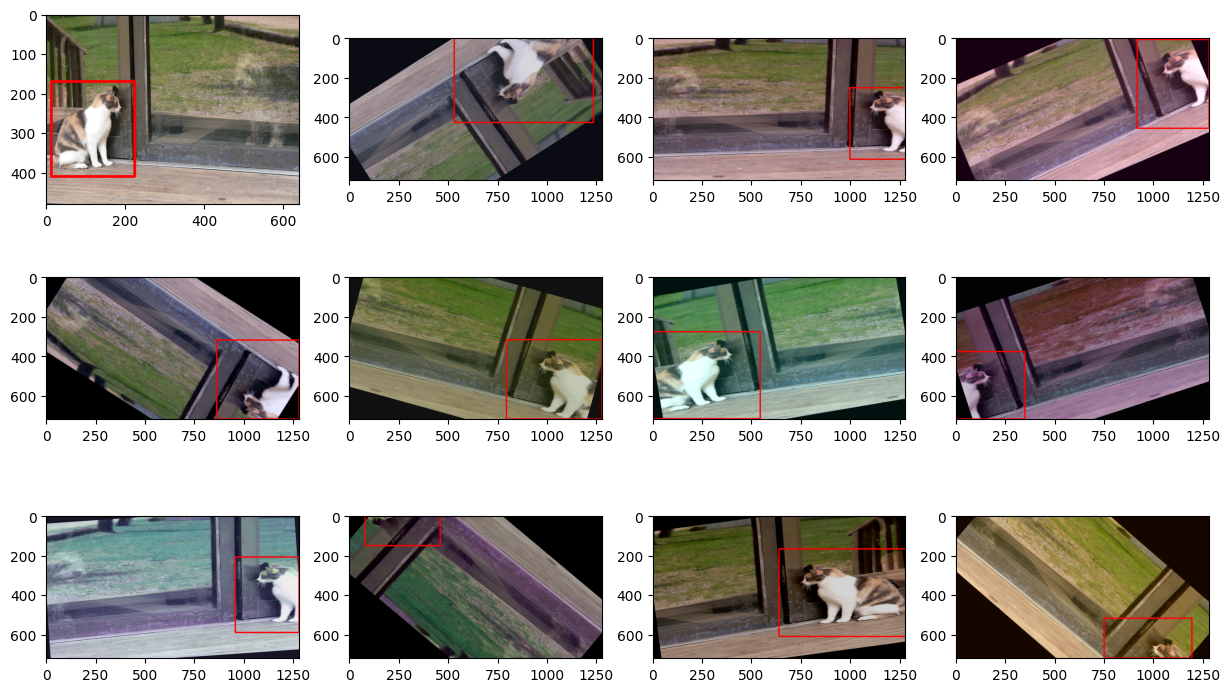

In [29]:
plot_examples(images_list, saved_bboxes)